# Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras_visualizer import visualizer
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, auc,roc_curve,roc_auc_score


# Looking Data

In [2]:
# to check out what we hvae in our Data folder
os.listdir('Data')

['VeryMildDemented', 'ModerateDemented', 'MildDemented', 'NonDemented']

In [3]:
data_dir = 'Data'

In [4]:
# this allows us to loop through the Data 
# directory VeryMildDemented folder for the images
len(os.listdir(os.path.join(data_dir, 'VeryMildDemented')))

8960

(190, 200, 3)


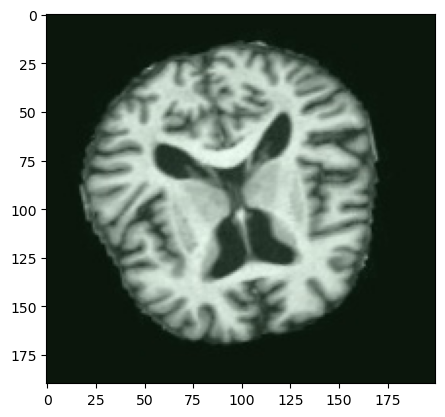

In [5]:
# loading and testing out data 
img = cv2.imread(os.path.join('Data','VeryMildDemented','2b70a7c4-b97a-4887-8e5f-85c079e7b275.jpg'))
print(img.shape)
plt.imshow(img);
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
# if you have color problem use this 

# Load Data

In [6]:
# Set up the paths and class labels
data_dir = 'Data'
class_labels = ['VeryMildDemented', 'ModerateDemented', 'MildDemented', 'NonDemented']
image_size = (50, 50) # Desired image size

In [7]:
# Load the images and labels:
img = []
lbl = []

for label_idx, label in enumerate(class_labels):
    folder_path = os.path.join(data_dir, label)
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file) # get the image
        image = cv2.imread(image_path) # read the image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = cv2.resize(image, image_size)  # Resize the image
        img.append(image)
        lbl.append(label_idx)

In [8]:
# Convert the images and labels to numpy arrays:
images = np.array(img)
labels = np.array(lbl)

# Train, Test, Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [10]:
x_train = X_train/255 # normalization
x_test = X_test/255

In [11]:
# Keras requires multi-class labels to be one-hot encoded
y_tr_one_hot = to_categorical(y_train)
y_tt_one_hot = to_categorical(y_test)
y_tt_one_hot

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [12]:
x_train.shape

(27187, 50, 50, 3)

# Build Model

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(50, 50,3))) # flattens each 28x28 image into a vector
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax')) # number of units = number of target classes

Metal device set to: Apple M2 Pro


2023-07-18 09:07:05.227902: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-18 09:07:05.228004: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy','AUC'] )

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 7500)              0         
                                                                 
 dense (Dense)               (None, 32)                240032    
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 240,332
Trainable params: 240,332
Non-trainable params: 0
_________________________________________________________________


# Visualize the Model

In [28]:
# visualizer(model, file_format='png', view=True, file_name='first_baseline_model')

# Fit the Model

In [17]:
# Earlystopping callback on training

# Monitor training loss and set improvement threshold (min_delta)
# Waiting certain number of epochs if no improvements (patience).
# Terminate training.

In [18]:
#  will use validation loss: stopping to prevent overfitting.
trainCallback = EarlyStopping(monitor='loss', min_delta = 1e-6, patience = 5)

In [19]:
history_model = model.fit(x_train, y_tr_one_hot, epochs=100, batch_size= 32, validation_split = 0.2, 
                 callbacks = [trainCallback] )

Epoch 1/100


2023-07-18 09:07:05.609055: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-18 09:07:05.758700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


680/680 [==============================] - ETA: 0s - loss: 1.2699 - accuracy: 0.3506 - auc: 0.6618

2023-07-18 09:07:12.715333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


680/680 [==============================] - 9s 12ms/step - loss: 1.2699 - accuracy: 0.3506 - auc: 0.6618 - val_loss: 1.2562 - val_accuracy: 0.3878 - val_auc: 0.6815
Epoch 2/100
680/680 [==============================] - 8s 11ms/step - loss: 1.1619 - accuracy: 0.4455 - auc: 0.7333 - val_loss: 1.1245 - val_accuracy: 0.4693 - val_auc: 0.7497
Epoch 3/100
680/680 [==============================] - 8s 11ms/step - loss: 1.1054 - accuracy: 0.4800 - auc: 0.7663 - val_loss: 1.0730 - val_accuracy: 0.4901 - val_auc: 0.7796
Epoch 4/100
680/680 [==============================] - 8s 11ms/step - loss: 1.0509 - accuracy: 0.5154 - auc: 0.7934 - val_loss: 1.0268 - val_accuracy: 0.5425 - val_auc: 0.8071
Epoch 5/100
680/680 [==============================] - 8s 11ms/step - loss: 1.0133 - accuracy: 0.5403 - auc: 0.8098 - val_loss: 1.0243 - val_accuracy: 0.5184 - val_auc: 0.8023
Epoch 6/100
680/680 [==============================] - 8s 11ms/step - loss: 0.9819 - accuracy: 0.5555 - auc: 0.8224 - val_loss: 0.94

680/680 [==============================] - 8s 11ms/step - loss: 0.6329 - accuracy: 0.7092 - auc: 0.9256 - val_loss: 0.7728 - val_accuracy: 0.6629 - val_auc: 0.8957
Epoch 48/100
680/680 [==============================] - 8s 11ms/step - loss: 0.6326 - accuracy: 0.7090 - auc: 0.9258 - val_loss: 1.0379 - val_accuracy: 0.5728 - val_auc: 0.8502
Epoch 49/100
680/680 [==============================] - 8s 11ms/step - loss: 0.6300 - accuracy: 0.7130 - auc: 0.9264 - val_loss: 0.7532 - val_accuracy: 0.6832 - val_auc: 0.9034
Epoch 50/100
680/680 [==============================] - 8s 11ms/step - loss: 0.6226 - accuracy: 0.7166 - auc: 0.9280 - val_loss: 0.7543 - val_accuracy: 0.6813 - val_auc: 0.9037
Epoch 51/100
680/680 [==============================] - 8s 11ms/step - loss: 0.6128 - accuracy: 0.7193 - auc: 0.9301 - val_loss: 0.7795 - val_accuracy: 0.6809 - val_auc: 0.9015
Epoch 52/100
680/680 [==============================] - 8s 11ms/step - loss: 0.6135 - accuracy: 0.7212 - auc: 0.9303 - val_loss:

680/680 [==============================] - 8s 11ms/step - loss: 0.5384 - accuracy: 0.7554 - auc: 0.9463 - val_loss: 0.7938 - val_accuracy: 0.6863 - val_auc: 0.9073
Epoch 94/100
680/680 [==============================] - 8s 11ms/step - loss: 0.5246 - accuracy: 0.7623 - auc: 0.9491 - val_loss: 0.7454 - val_accuracy: 0.7014 - val_auc: 0.9123
Epoch 95/100
680/680 [==============================] - 8s 11ms/step - loss: 0.5207 - accuracy: 0.7645 - auc: 0.9498 - val_loss: 0.7873 - val_accuracy: 0.6936 - val_auc: 0.9104
Epoch 96/100
680/680 [==============================] - 8s 11ms/step - loss: 0.5334 - accuracy: 0.7621 - auc: 0.9475 - val_loss: 0.8627 - val_accuracy: 0.6627 - val_auc: 0.8948
Epoch 97/100
680/680 [==============================] - 8s 11ms/step - loss: 0.5300 - accuracy: 0.7603 - auc: 0.9481 - val_loss: 0.7665 - val_accuracy: 0.7006 - val_auc: 0.9114
Epoch 98/100
680/680 [==============================] - 8s 11ms/step - loss: 0.5320 - accuracy: 0.7582 - auc: 0.9478 - val_loss:

# Evaluate Model

In [20]:
# probability for each class
y_proba = model.predict(x_test)
y_proba

 99/213 [============>.................] - ETA: 0s

2023-07-18 09:19:52.742273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


213/213 [==============================] - 0s 2ms/step


array([[1.0152762e-01, 7.3587070e-09, 8.9250386e-01, 5.9685321e-03],
       [7.8784090e-01, 1.2901287e-17, 1.5454461e-02, 1.9670460e-01],
       [4.3317053e-01, 5.1355828e-06, 3.2422650e-01, 2.4259780e-01],
       ...,
       [1.0613708e-01, 2.9647296e-32, 3.4458658e-12, 8.9386284e-01],
       [7.5332024e-03, 2.7115139e-24, 9.2028951e-14, 9.9246675e-01],
       [1.3027994e-01, 5.0771382e-18, 8.6688930e-01, 2.8307377e-03]],
      dtype=float32)

In [21]:
model.evaluate(x_test, y_tt_one_hot)

213/213 [==============================] - 2s 9ms/step - loss: 0.7948 - accuracy: 0.6930 - auc: 0.9066


[0.7948213219642639, 0.6929527521133423, 0.9065977334976196]

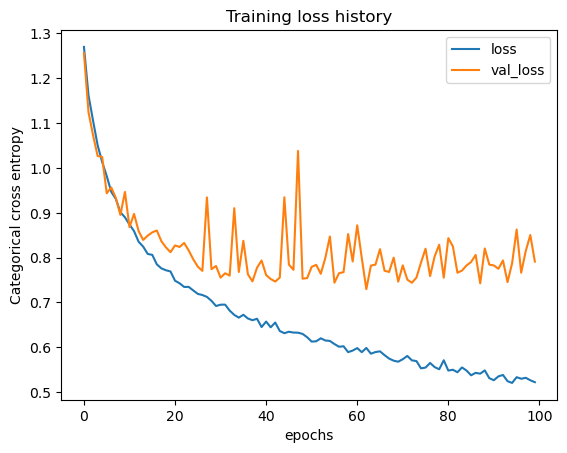

In [22]:
train_history_model = pd.DataFrame(history_model.history)
train_history_model.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_history_model[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

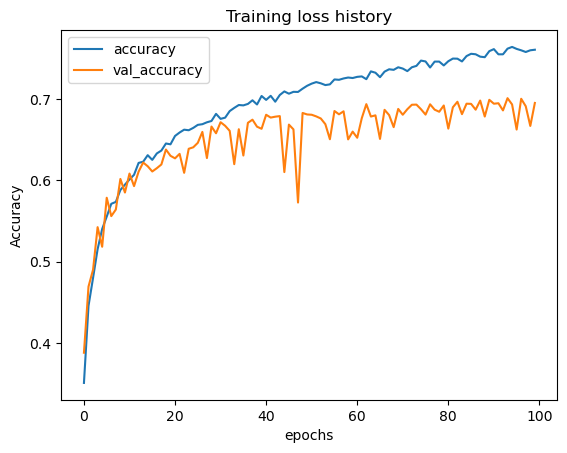

In [23]:
col_list = ['accuracy', 'val_accuracy']
train_history_model[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [24]:
# argmax axis = -1 gets the column index of maximum probability for each row.
# column index corresponds to digit classes (numbers 0 -9)
predicted = np.argmax(y_proba, axis=-1)
predicted

array([2, 0, 0, ..., 3, 3, 2])

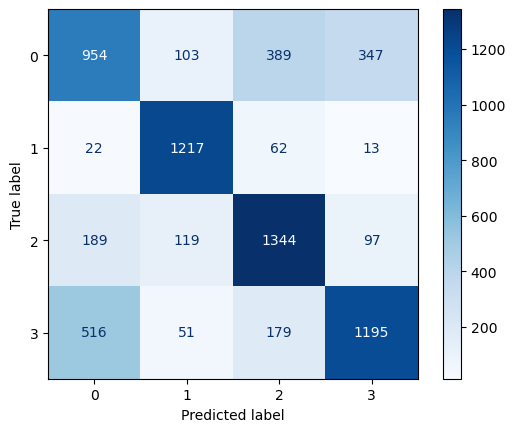

In [25]:
cm_class = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_class)

disp.plot(cmap=plt.cm.Blues)
plt.show()